# Filtering with Pyleoclim

A common task that befalls the analyst is to filter timeseries to highlight signals of interest. In this notebook we illustrate how easy this is in *Pyleoclim*.

First let's import this and other useful packages, as well as the example data:

In [1]:
%load_ext autoreload
%autoreload 2
import pyleoclim as pyleo
import scipy.io as sio
pyleo.set_style('web') # set graphic style

data = sio.loadmat('../example_data/wtc_test_data_nino.mat')
air = data['air'][:, 0]
nino = data['nino'][:, 0]
t = data['datayear'][:, 0]

## 1. Setting the stage

As usual, we start by putting the data into *Pyleoclim* `Series` objects for easy manipulation

In [2]:
ts_air = pyleo.Series(time=t, value=air, value_name='Index', time_name='Time', time_unit='yr')
ts_nino = pyleo.Series(time=t, value=nino, value_name='SST anom.', value_unit='K', time_name='Time', time_unit='yr')

Now that the objects are defined, it's ready to do some visualization.
Note that the visualization style has been automatically customized when we import the *Pyleoclim* package. 

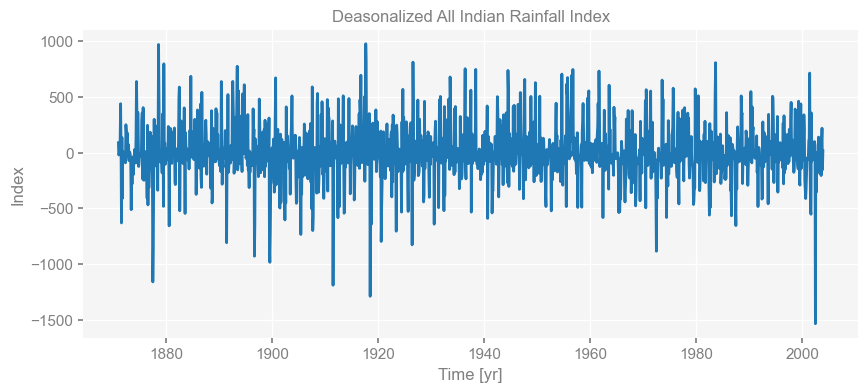

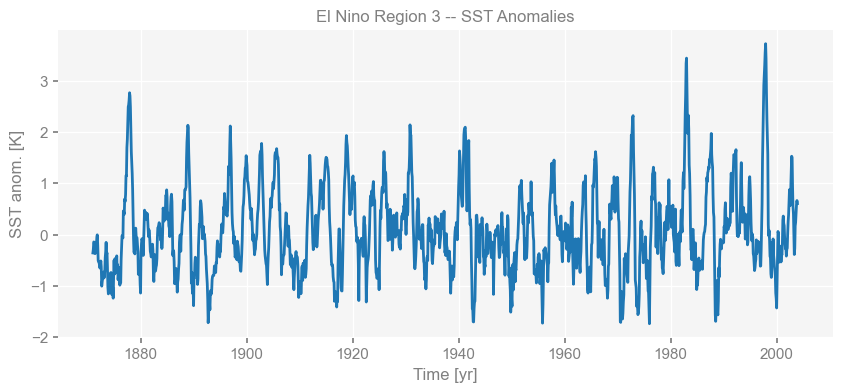

In [3]:
fig, ax = ts_air.plot(title='Deasonalized All Indian Rainfall Index')
fig, ax = ts_nino.plot(title='El Nino Region 3 -- SST Anomalies')

There are many ways to assess relationships between series. At high frequency there is no obvious relationship, as can be found when applying causality analysis (cf pyleoclim_ui_tutorial).  But what about relationship at timescales longer than 1 years ("interannual"), specifically the canonical ENSO band of 2-7 years. To assess it, *Pyleoclim* facilitates 2 sorts of filter:  (1) frequency-based filters and (2) time-based filters.

## 2. frequency-based filters

The most common form of filters in the digital age are based in the frequency domain (hence the name). Frequency-based fitlers work 

### 2.1 lowpass filtering



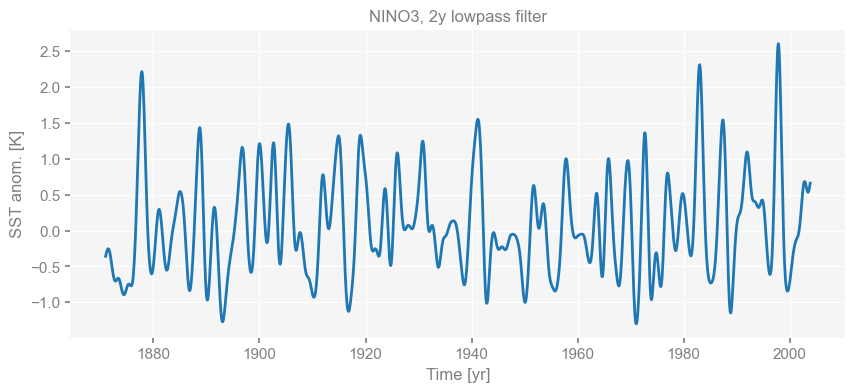

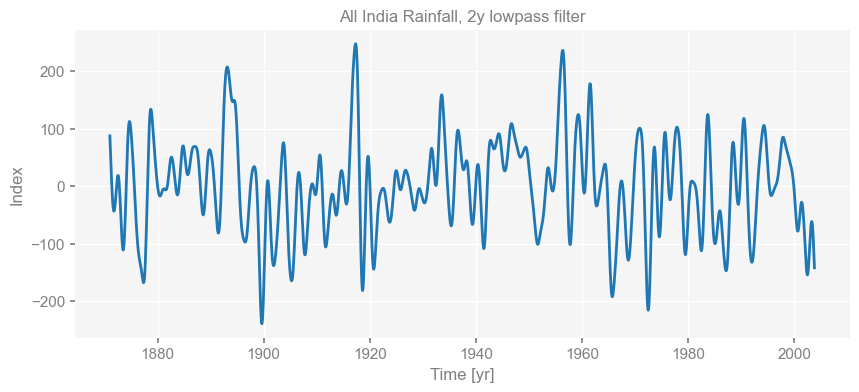

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:title={'center':'All India Rainfall, 2y lowpass filter'}, xlabel='Time [yr]', ylabel='Index'>)

In [15]:
nino_i = ts_nino.interp()
nino_low = nino_i.filter(cutoff_scale=2)
f1, ax1 = nino_low.plot(title='NINO3, 2y lowpass filter')
air_i = ts_air.interp()
air_low = air_i.filter(cutoff_scale=2)
air_low.plot(title='All India Rainfall, 2y lowpass filter')

Now it is easier to see how there might be similarities between the two series. To be more quantitative, we can use _Pyleoclim_'s correlation method: 



In [13]:
corr = nino_low.correlation(air_low,settings={'nsim': 10000})
print(corr)

{'r': -0.440157286953315, 'p': 0.0, 'signif': True, 'alpha': 0.05}


The anticorrelation is fairly strong, and highly significant. 

TODO: update with pval_format() 

### 2.2 Bandpass filtering

Now, is this correlation mostly happening in the the ENSO band (2-7 years)? To apply such a bandpass-filter, you would do it so 
If you wanted to zoom in on , you would do it thus:

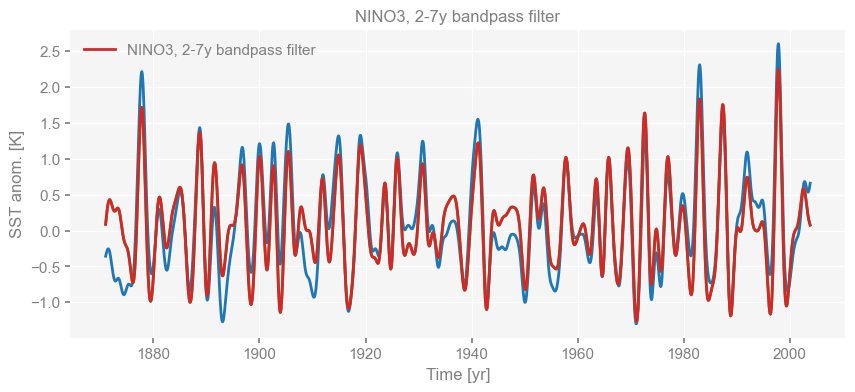

In [18]:
nino_bp = nino_i.filter(cutoff_scale=[2,7]).plot(label='NINO3, 2-7y bandpass filter',ax=ax1)
pyleo.showfig(f1)

padding, edge effects, etc

## 3. Time-based filter: Singular Spectrum analysis

TODO: 
- scree plot method (guthub issue 136)
- explain how MCSSA can be used to filter a timeseries. 
- effects of detrending